In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings;
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [11]:
# checking for missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# checking for Null values if any!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

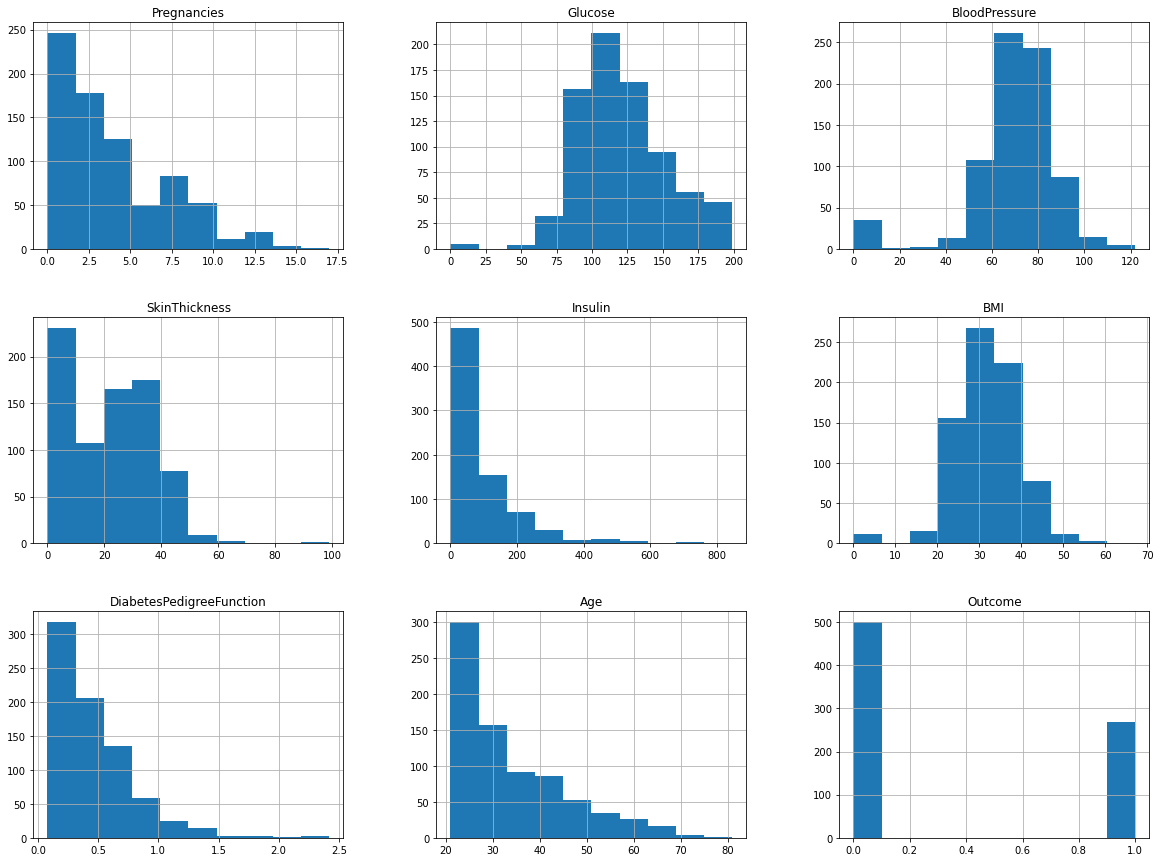

In [9]:
df.hist(figsize=(20,15))

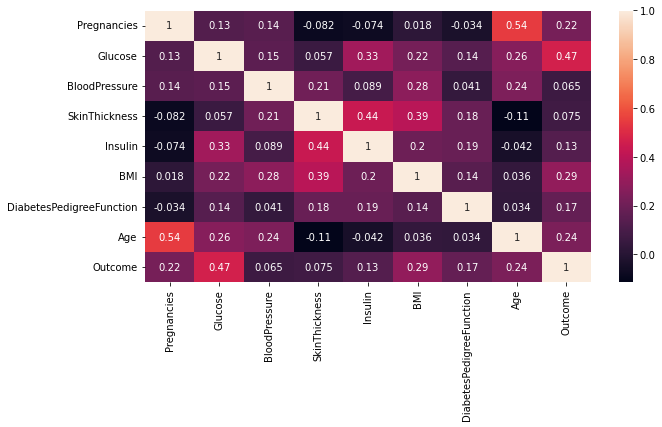

In [14]:
plt.figure(1 , figsize = (10, 5))
cor = sns.heatmap(df.corr(), annot = True)

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

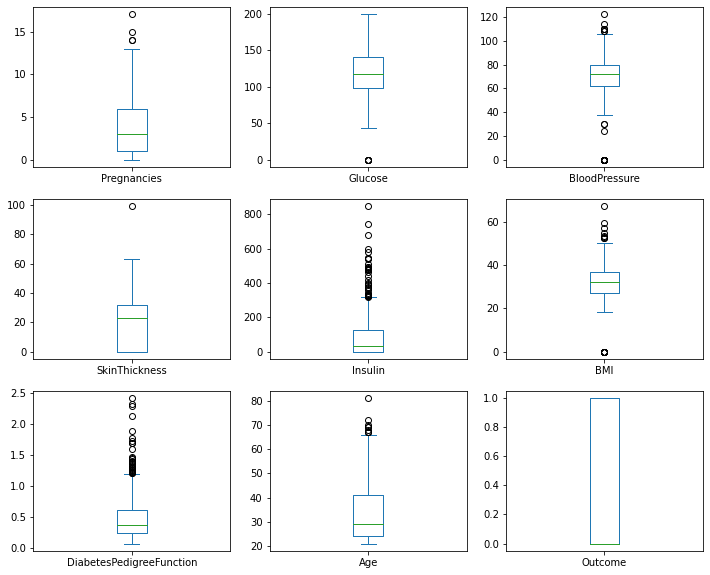

In [15]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [17]:
Q1=df['BMI'].quantile(0.25)                         #using IQR method
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

27.3
36.6
9.3
13.35 50.550000000000004


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.shape

(768, 9)

In [20]:
df1= df

In [24]:
df1.shape

(768, 9)

In [21]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
num_list = ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose']
def outlier_count(col, data=df1):
    print("For "+col)
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Outlier Count: {}'.format(outlier_count))
    print('Outlier percentage of data: {}%'.format(outlier_percent))
    print("-"*30)
for col in num_list:
    outlier_count(col)

For Pregnancies
Outlier Count: 4
Outlier percentage of data: 0.52%
------------------------------
For Insulin
Outlier Count: 34
Outlier percentage of data: 4.43%
------------------------------
For BMI
Outlier Count: 19
Outlier percentage of data: 2.47%
------------------------------
For DiabetesPedigreeFunction
Outlier Count: 29
Outlier percentage of data: 3.78%
------------------------------
For Age
Outlier Count: 9
Outlier percentage of data: 1.17%
------------------------------
For Glucose
Outlier Count: 5
Outlier percentage of data: 0.65%
------------------------------


In [28]:
features_with_outliers = ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for feature in features_with_outliers:
    q1 = df1[feature].quantile(0.25)#the median of the lower half 
    q3 = df1[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df1[feature]<lower_limit,feature] = lower_limit
    df1.loc[df1[feature]>upper_limit,feature] = upper_limit

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

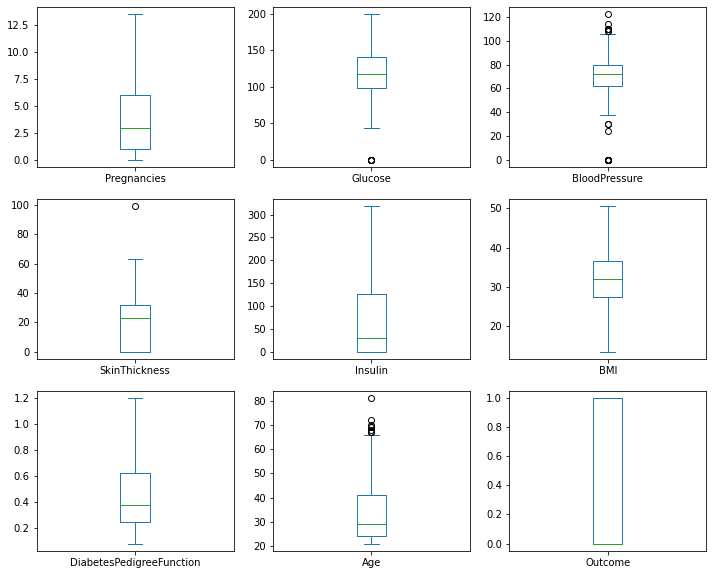

In [29]:
df1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [30]:
df1.shape

(768, 9)

In [31]:
features_with_outliers = ['Age', 'BloodPressure']
for feature in features_with_outliers:
    q1 = df1[feature].quantile(0.25)#the median of the lower half 
    q3 = df1[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df1[feature]<lower_limit,feature] = lower_limit
    df1.loc[df1[feature]>upper_limit,feature] = upper_limit

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

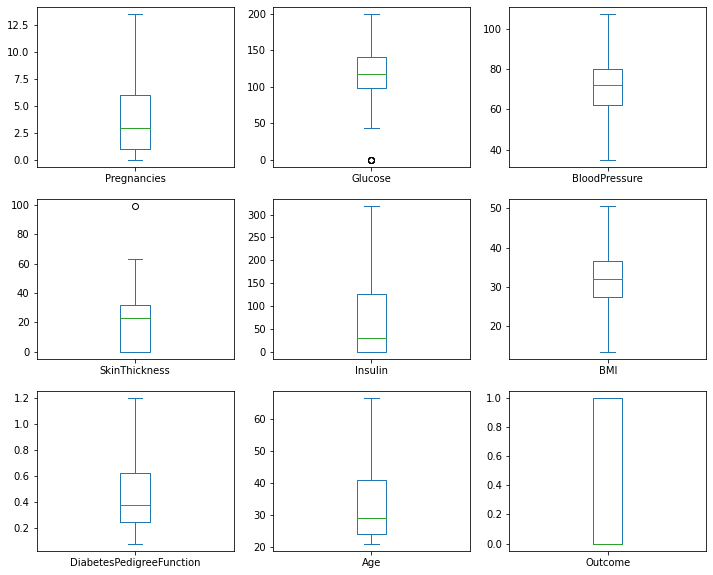

In [32]:
df1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [33]:
df1.shape

(768, 9)

In [35]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
target=df1['Outcome']
feature = df1.drop('Outcome', axis=1)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [39]:
df1 = df1.astype(int)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.20,random_state=0)

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [45]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35,0.0,33.6,0.627,50.0
1,1.0,85,66,29,0.0,26.6,0.351,31.0
2,8.0,183,64,0,0.0,23.3,0.672,32.0
3,1.0,89,66,23,94.0,28.1,0.167,21.0
4,0.0,137,40,35,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101,76,48,180.0,32.9,0.171,63.0
764,2.0,122,70,27,0.0,36.8,0.340,27.0
765,5.0,121,72,23,112.0,26.2,0.245,30.0
766,1.0,126,60,0,0.0,30.1,0.349,47.0


In [46]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

NameError: name 'Sequential' is not defined